In [31]:
import pandas as pd
import scipy

import netpixi
import graph_tool_extras as gte

import distribution as dst
from graph_tool import centrality

In [2]:
g = gte.load('./rede.net.gz')

# Descrição da Rede
Obtendo o tamanho da rede (número de vérticies e arestas).

In [3]:
print(f'Número de Verticies: {g.num_vertices()}')
print(f'Número de Arestas: {g.num_edges()}')

Número de Verticies: 17903
Número de Arestas: 197031


Obtendo a densidade da rede por meio da função `density`.

In [4]:
print(f'Densidade: {g.density()}%')

Densidade: 0.122952%


Obentendo a transitividade da rede por meio da função `transitivity`.

In [5]:
print(f'Transitividade: {g.transitivity()}%')

Transitividade: 31.777791%


Obtendo o número total de vizinhos de cada um dos vérticies por meio da função `get_total_degrees`.  

In [6]:
degrees = g.get_total_degrees()

count    17903.000000
mean        22.010948
std         31.016923
min          1.000000
25%          4.000000
50%         10.000000
75%         28.000000
max        504.000000
dtype: float64

In [ ]:
degrees.describe()

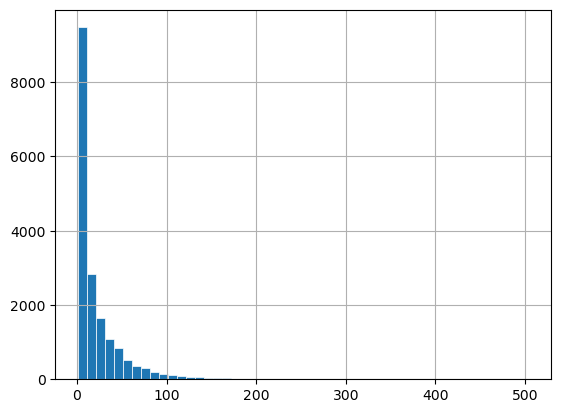

In [7]:
degrees.hist(bins=50, edgecolor='white', linewidth=0.5);

Analizando a **normalidade** da destribuição dos `degree` através da função `not_normal`.

In [8]:
p_value = dst.not_normal(degrees)
print(f'Not Normal: {'<0.001' if p_value < 0.001 else float(p_value)}')

Not Normal: <0.001


Analizando se a destribuição dos `degree` é mais **power law** do que **lognormal** através da função `more_powerlaw_than_lognormal`.

In [9]:
powerlaw, p_value = dst.more_powerlaw_than_lognormal(degrees)
print(f'More Powerlaw than Lognormal: {'{float(p_value)} (Inconclusivo)' if 0.05 < p_value < 0.1 else ('<0.001' if  p_value < 0.001 else float(p_value))} {'[powerlaw]' if powerlaw else ''}')

More Powerlaw than Lognormal: 0.8680756462375805 


Calculating best minimal value for power law fit
/opt/miniconda/envs/jupyterlab/lib/python3.12/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


Analizando se a destribuição dos `degree` é mais **power law** do que **exponential** através da função `more_powerlaw_than_exponential`.

In [10]:
powerlaw, p_value = dst.more_powerlaw_than_exponential(degrees)
print(f'More Powerlaw than Exponential: {'{float(p_value)} (Inconclusivo)' if 0.05 < p_value < 0.1 else ('<0.001' if  p_value < 0.001 else float(p_value))} {'[powerlaw]' if powerlaw else ''}')

Calculating best minimal value for power law fit


More Powerlaw than Exponential: 0.014483332945893693 [powerlaw]


## Distâncias

Obtendo as distâncias entre cada vérticie da rede por meio da função `get_distances`.

**OBS.:** Essas funçãoes estão comentadas pois, mesmoq eu a `get_distances` consiga rodar, o kernel tende a crashar sem conseguir rodar o `discribe` ou o `hist`, impossibilitando continuar executando o resto do notebook.

In [11]:
# distances = g.get_distances()

In [12]:
# distances.describe()

In [13]:
# distances.hist()

# Métricas da Rede

## Closeness
Primeiro, calculamos a centralidade _closeness_ com `closeness`.

In [14]:
c = centrality.closeness(g, harmonic=True)

Depois, adicionamos a propriedade de vértice ao grafo com `add_vp`.

In [15]:
g.add_vp('closeness', c)

Então, salvamos a rede modificada para podermos visualizá-la.

In [16]:
gte.save(g, 'closeness.net.gz')

Para visualizar a rede, precisamos descomentar as linhas abaixo quando nenhuma outra visualização estiver rodando.

In [17]:
# rb = netpixi.render('closeness.net.gz')

In [18]:
# rb.vertex_scale('closeness', 10, 30)

## Betweeness
Agora, para calcularmos o _betweeness_, utilizamos a função `betweenness`.

In [19]:
b, _ = centrality.betweenness(g)

Novamente, precisamos adicionar a propriedade de vértice ao grafo com `add_vp`.

In [20]:
g.add_vp('betweenness', b)

Salvando a rede:

In [21]:
gte.save(g, 'betweenness.net.gz')

E por fim, executandos o `render`.

In [22]:
# rb = netpixi.render('betweenness.net.gz', )

In [23]:
# rb.vertex_scale('betweenness', 10, 30)

## Degrees
Para calcular a centralidade _degree_, utilizamos a função `total_degree`.

In [24]:
d = gte.total_degree(g)

Adicionamos a propriedade ao grafo.

In [25]:
g.add_vp('degree', d)

Salvamos a rede:

In [26]:
gte.save(g, 'degree.net.gz')

E executamos a visualização com `render`, ajustando a escala dos vértices com `vertex_scale`.

In [27]:
# rd = netpixi.render('degree.net.gz')

In [28]:
# rd.vertex_scale('degree', 10, 30)

## Correlações
Para calcular as correlações utilizamos a função `pearsonr` com combinaçãos dos valores de `closeness`, `betweeness` e `degree`, obtendo um coeficiente e um p-valor, este que será convertido em uma escala de asteriscos.

In [32]:
def pearsonr(x, y, ndigits=10):
    statistic, p_value = scipy.stats.pearsonr(x, y)
    
    asterisk = ''
    statistic = round(statistic, ndigits)
    
    if statistic == 1: 
        asterisk = ' (óbvio)'
    elif p_value < 0.01: 
        asterisk = ' ***'
    elif p_value < 0.05: 
        asterisk = ' **'
    elif p_value < 0.1: 
        asterisk = ' *'
        
    return f'{statistic} {asterisk}'

In [33]:
data = [c, b, d]
result = pd.DataFrame([ [ pearsonr(j, i) for j in data ] for i in data ])
result

,0,1,2
0,1.0 (óbvio),0.4037739317 ***,0.700593892 ***
1,0.4037739317 ***,1.0 (óbvio),0.7024434114 ***
2,0.700593892 ***,0.7024434114 ***,1.0 (óbvio)
